# Code ini merupakan lanjutan dari File Project Klasifikasi

**Dilakukan preprocessing dgn cara "dropna", jika value "?" dijadikan sebagai nilai null**

In [1]:
# All Modules are we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# print(plt.style.available) # Bisa pake style mana aja. Yg penting enak dilihat
plt.style.use('seaborn-darkgrid')

datake3 = pd.read_csv("C:/Users/asus/Anaconda3/DSU/Supervised/dsu.csv")

**Preprocessing**

In [2]:
datake3 = datake3.dropna()

In [3]:
datake3.shape

(32561, 15)

In [4]:
#Split data menjadi variabel bebas (x) dan variabel tak bebas (y)
y = datake3.income
x = datake3.drop(['income', 'fnlwgt', 'education'], axis=1) #dihapus karena tidak begitu berperan dalam klasifikasi ini

In [5]:
x = pd.get_dummies(x)
x.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,9,0,4356,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,9,0,4356,18,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,66,10,0,4356,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,3900,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,10,0,3900,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**Modelling**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 10)

In [8]:
X = pd.concat([x_train, y_train], axis = 1)
X.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income
6474,45,11,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
12785,60,13,0,0,50,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
24072,35,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
14327,47,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,>50K
15789,81,2,0,0,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,<=50K


**Data Imbalance**

<=50K    16575
>50K      5240
Name: income, dtype: int64


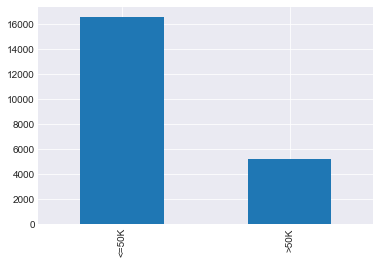

In [9]:
print(X.income.value_counts())
X['income'].value_counts().sort_index().plot.bar()

**Balancing Data**

<=50K    16575
>50K     16575
Name: income, dtype: int64


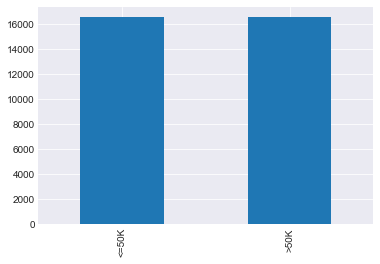

In [10]:
from sklearn.utils import resample

lebih = X[X.income == '>50K']
kurang = X[X.income == '<=50K']

#Oversampling
lebih_over = resample(lebih,
                replace = True,
                n_samples = len(kurang),
                random_state = 10)

#Menggabung lagi
overdata = pd.concat([kurang, lebih_over])

#Dihitungdatanya
print(overdata.income.value_counts())

overdata['income'].value_counts().sort_index().plot.bar()

In [11]:
y_baru = overdata.income
x_baru = overdata.drop(['income'], axis=1)

**KNN**

In [21]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')
knn1.fit(x_baru, y_baru)
y1_prediksi2 = knn1.predict(x_test)
akurasi2 = accuracy_score(y_test, y1_prediksi2)

confusion_matrix(y_test, y1_prediksi2)
pd.crosstab(y_test, y1_prediksi2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,<=50K,>50K,All
True,,,
<=50K,7545,600,8145
>50K,1179,1422,2601
All,8724,2022,10746


Text(0.5, 19.5, 'Label prediksi')

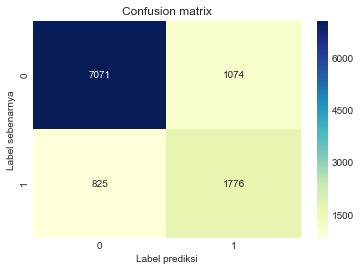

In [13]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y1_prediksi2)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Label sebenarnya')
plt.xlabel('Label prediksi')

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y1_prediksi2))

              precision    recall  f1-score   support

       <=50K       0.90      0.87      0.88      8145
        >50K       0.62      0.68      0.65      2601

   micro avg       0.82      0.82      0.82     10746
   macro avg       0.76      0.78      0.77     10746
weighted avg       0.83      0.82      0.83     10746



**Decision Tree**

In [15]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10, criterion='entropy')
model.fit(x_baru, y_baru)
y1_prediksi2 = model.predict(x_test)
akurasi2 = accuracy_score(y_test, y1_prediksi2)

confusion_matrix(y_test, y1_prediksi2)
pd.crosstab(y_test, y1_prediksi2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,<=50K,>50K,All
True,,,
<=50K,6363,1782,8145
>50K,391,2210,2601
All,6754,3992,10746


Text(0.5, 19.5, 'Label prediksi')

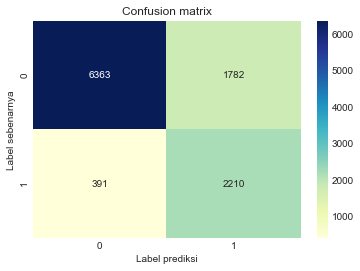

In [16]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y1_prediksi2)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Label sebenarnya')
plt.xlabel('Label prediksi')

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y1_prediksi2))

              precision    recall  f1-score   support

       <=50K       0.94      0.78      0.85      8145
        >50K       0.55      0.85      0.67      2601

   micro avg       0.80      0.80      0.80     10746
   macro avg       0.75      0.82      0.76     10746
weighted avg       0.85      0.80      0.81     10746



**SVC**

In [18]:
# Support vector Classifier
from sklearn.svm import SVC
model = SVC()

model.fit(x_baru, y_baru)
y1_prediksi2 = model.predict(x_test)
akurasi2 = accuracy_score(y_test, y1_prediksi2)

confusion_matrix(y_test, y1_prediksi2)
pd.crosstab(y_test, y1_prediksi2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,<=50K,>50K,All
True,,,
<=50K,6632,1513,8145
>50K,409,2192,2601
All,7041,3705,10746


Text(0.5, 19.5, 'Label prediksi')

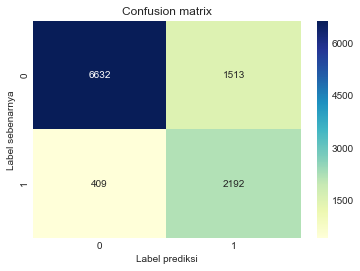

In [19]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y1_prediksi2)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Label sebenarnya')
plt.xlabel('Label prediksi')

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y1_prediksi2))

              precision    recall  f1-score   support

       <=50K       0.94      0.81      0.87      8145
        >50K       0.59      0.84      0.70      2601

   micro avg       0.82      0.82      0.82     10746
   macro avg       0.77      0.83      0.78     10746
weighted avg       0.86      0.82      0.83     10746



# Jika ingin optimalisasi model

**Pakai Algoritma sklearn.model_selection.GridSearchCV untuk mendapatkan estimasi parameter yg paling baik, supaya didapatkan model yg lebih akurat**

Link Algoritmanya:
https://translate.googleusercontent.com/translate_c?depth=1&hl=id&prev=search&pto=aue&rurl=translate.google.com&sl=en&sp=nmt4&u=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html&usg=ALkJrhijQyIuU2Vru_0ievba_qXEQ7VfVQ#sklearn.model_selection.GridSearchCV

Link Contoh Programnya:
https://translate.google.com/translate?hl=id&sl=en&u=http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html&prev=search&pto=aue

**Link Contoh Program GridSearchCV:**

https://translate.google.com/translate?hl=id&sl=en&u=http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html&prev=search&pto=aue


In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.983 (+/-0.015) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.956 (+/-0.027) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.985 (+/-0.014) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.020) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.985 (+/-0.014) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.019) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.985 (+/-0.014) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.019) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.976 (+/-0.002) for {'C': 1, 'kernel': 'linear'}
0.976 (+/-0.002) for {'C': 10, 'kernel': 'linear'}
0.976 (+/-0.002) for {'C': 100, 'kernel': 'linear'}
0.976 (+/-0.002) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 